In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir(r'C:\Users\fzh00\Desktop\文件\excel\阿里天池\二手车交易')

In [2]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [3]:
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [4]:
data = pd.read_csv('used_car_train_20200313.csv',sep=' ')
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [5]:
test =pd.read_csv('used_car_testB_20200421.csv',sep=' ')
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [8]:
data.notRepairedDamage.value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [5]:
data['车龄']=pd.to_datetime(data['creatDate'].astype(str),errors='coerce').dt.year-pd.to_datetime(data['regDate'].astype(str),errors='coerce').dt.year

In [58]:
test['车龄']=pd.to_datetime(test['creatDate'].astype(str),errors='coerce').dt.year-pd.to_datetime(test['regDate'].astype(str),errors='coerce').dt.year
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322,16.0
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542,21.0
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173,7.0
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610,14.0
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014,13.0


In [13]:
(data==0).any()

SaleID                True
name                  True
regDate              False
model                 True
brand                 True
bodyType              True
fuelType              True
gearbox               True
power                 True
kilometer            False
notRepairedDamage    False
regionCode            True
seller                True
offerType             True
creatDate            False
price                False
v_0                  False
v_1                  False
v_2                  False
v_3                  False
v_4                  False
v_5                   True
v_6                   True
v_7                   True
v_8                   True
v_9                   True
v_10                 False
v_11                 False
v_12                 False
v_13                 False
v_14                 False
车龄                    True
dtype: bool

In [25]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,0


In [8]:
data2.dropna(axis=0,inplace=True)
data2.shape

(129710, 25)

In [59]:
test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
车龄                   3736
dtype: int64

In [17]:
data.seller.value_counts()

0    135883
1         1
Name: seller, dtype: int64

In [6]:
data2 = data.drop(['SaleID','name','regDate','creatDate','notRepairedDamage','seller','offerType'],axis=1)
data2.describe()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,price,v_0,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
count,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,138653.000000
mean,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,5923.327333,44.406268,...,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688,12.380352
std,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,7501.998477,2.457548,...,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685,5.342764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,11.000000,30.451976,...,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556,1.000000
25%,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,1300.000000,43.135799,...,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034,8.000000
50%,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,3250.000000,44.610266,...,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246,12.000000
75%,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,7700.000000,46.004721,...,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378,16.000000
max,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,99999.000000,52.304178,...,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418,25.000000


In [61]:
test2 = test.drop(['SaleID','name','regDate','creatDate','notRepairedDamage','seller','offerType'],axis=1)

In [9]:
data2.drop('offerType',axis=1,inplace=True)

In [36]:
data2.车龄.value_counts()

10.0    8478
17.0    8387
11.0    8215
13.0    8048
12.0    8040
15.0    7864
14.0    7682
16.0    7581
9.0     7426
8.0     6937
7.0     6810
18.0    6458
6.0     5442
19.0    5300
5.0     5271
4.0     4095
20.0    3835
21.0    2753
3.0     2683
2.0     2158
22.0    1707
1.0     1282
23.0    1174
24.0    1096
25.0     988
Name: 车龄, dtype: int64

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   model       149999 non-null  float64
 1   brand       150000 non-null  int64  
 2   bodyType    145494 non-null  float64
 3   fuelType    141320 non-null  float64
 4   gearbox     144019 non-null  float64
 5   power       150000 non-null  int64  
 6   kilometer   150000 non-null  float64
 7   regionCode  150000 non-null  int64  
 8   price       150000 non-null  int64  
 9   v_0         150000 non-null  float64
 10  v_1         150000 non-null  float64
 11  v_2         150000 non-null  float64
 12  v_3         150000 non-null  float64
 13  v_4         150000 non-null  float64
 14  v_5         150000 non-null  float64
 15  v_6         150000 non-null  float64
 16  v_7         150000 non-null  float64
 17  v_8         150000 non-null  float64
 18  v_9         150000 non-null  float64
 19  v_

In [9]:
data2.head()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,price,v_0,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
0,30.0,6,1.0,0.0,0.0,60,12.5,1046,1850,43.357796,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.0
1,40.0,1,2.0,0.0,0.0,0,15.0,4366,3600,45.305273,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13.0
2,115.0,15,1.0,0.0,0.0,163,12.5,2806,6222,45.978359,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.0
3,109.0,10,0.0,0.0,1.0,193,15.0,434,2400,45.687478,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20.0
4,110.0,5,1.0,0.0,0.0,68,5.0,6977,5200,44.383511,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.0


In [41]:
data2.columns

Index(['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'regionCode', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14', '车龄'],
      dtype='object')

In [46]:
data2.corr()[abs(data2.corr())>0.5]

,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,price,v_0,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄
model,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.525614,NaN
brand,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bodyType,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuelType,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gearbox,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kilometer,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527234
regionCode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.754845,...,NaN,NaN,0.693187,NaN,NaN,NaN,0.782824,NaN,NaN,-0.614049
v_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754845,1.000000,...,NaN,NaN,0.675252,NaN,NaN,NaN,0.880700,NaN,NaN,-0.635128


In [16]:
formula = 'price~model+brand+bodyType+fuelType+gearbox+power+kilometer+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model = smf.ols(formula,data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        15:08:51   Log-Likelihood:            -1.2651e+06
No. Observations:              129710   AIC:                         2.530e+06
Df Residuals:                  129686   BIC:                         2.531e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.833e+09   1.52e+09     -5.167      0.000   -1.08e+10   -4.86e+09
model         10.0791      0.335     30.075      0.000       9.422      10.736
brand        -17.7649      1.811     -9.811      0.000     -21.314     -14.216
bodyType     211.2236      8.597     24.568      0.000     194.373     228.074
fuelType    -159.7800     24.019     -6.652      0.000    -206.857    -112.703
gearbox     1552.7241     30.335     51.186      0.000    1493.268    1612.181
power          2.2618      0.073     30.914      0.000       2.118       2.405
kilometer   -323.8269      3.796    -85.312      0.000    -331.267    -316.387
v_0         1.786e+08   3.46e+07      5.165      0.000    1.11e+08    2.46e+08
v_1         4.418e+09   8.32e+08      5.313      0.000    2.79e+09    6.05e+09
v_2         1.668e+09   3.09e+08      5.398      0.000    1.06e+09    2.27e+09
v_3        -9.706e+07   1.72e+07     -5.653      0.000   -1.31e+08   -6.34e+07
v_4         1.363e+06   2.07e+05      6.596      0.000    9.58e+05    1.77e+06
v_5         1.401e+07   1.98e+06      7.077      0.000    1.01e+07    1.79e+07
v_6         5.061e+06   1.51e+05     33.494      0.000    4.76e+06    5.36e+06
v_7         2.476e+06   3.42e+05      7.230      0.000     1.8e+06    3.15e+06
v_8         4.527e+06   5.27e+05      8.589      0.000    3.49e+06    5.56e+06
v_9         3.978e+06   4.97e+05      8.006      0.000       3e+06    4.95e+06
v_10        3.674e+09   6.93e+08      5.303      0.000    2.32e+09    5.03e+09
v_11       -2.913e+09   5.45e+08     -5.349      0.000   -3.98e+09   -1.85e+09
v_12       -5.965e+08   1.09e+08     -5.477      0.000    -8.1e+08   -3.83e+08
v_13       -3.128e+06   4.87e+05     -6.425      0.000   -4.08e+06   -2.17e+06
v_14        4.081e+04   5655.719      7.216      0.000    2.97e+04    5.19e+04
车龄            80.2879      6.039     13.295      0.000      68.451      92.124
==============================================================================
Omnibus:                   110291.399   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7605596.301
Skew:                           3.719   Prob(JB):                         0.00
Kurtosis:                      39.769   Cond. No.                     3.61e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# vif时，需手动添加截距项
#手动去除因变量
#手动添加截距项
data_vif = data2.drop(['price'], axis=1)
data_vif['Inter'] = 1  #相当于添加了截距项
#计算每个变量的VIF值 1-3正常，3-10岭回归处理，>10建议删除
for i in range(0,data_vif.shape[1]):
    print(data_vif.columns[i], vif(data_vif,i))

model 2.0913552561460054
brand 1.5232111776116057
bodyType 1.7299420955868703
fuelType 1.295664093108244
gearbox 1.2251123137586586
power 1.0903594006573307
kilometer 1.6498275946816956
regionCode 1.1390020153635834
v_0 32168568766932.113
v_1 inf
v_2 500399958596721.75
v_3 8347728688360.512
v_4 458910848.57861495
v_5 5752510.077178074
v_6 467723.085911841
v_7 1645773.8864972955
v_8 1732939.9790272443
v_9 2312430.862938032
v_10 inf
v_11 9007199254740992.0
v_12 474063118670578.5
v_13 2954193226.510138
v_14 268934.48267477244
车龄 7.837234239254914
Inter 0.0


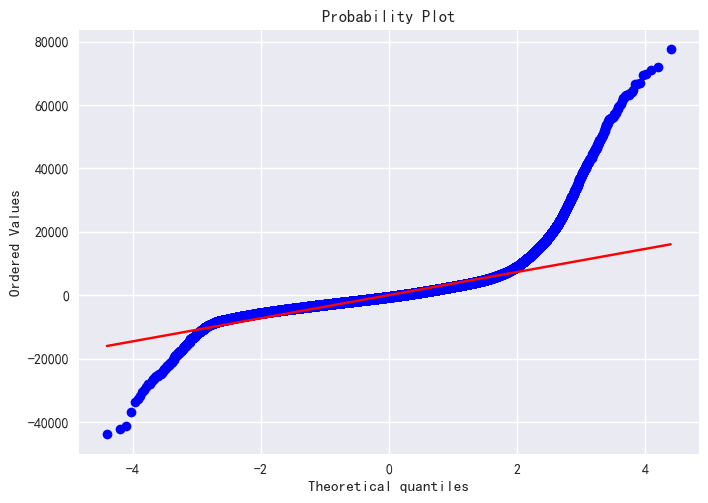

In [50]:
# 正态性
res = stats.probplot(model.resid, plot=plt)

In [10]:
formula2 = 'np.log(price+1)~model+brand+bodyType+fuelType+gearbox+power+kilometer+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model2 = smf.ols(formula2,data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(price + 1)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 7.678e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        15:03:50   Log-Likelihood:                -29662.
No. Observations:              129710   AIC:                         5.937e+04
Df Residuals:                  129686   BIC:                         5.961e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.62e+05   1.11e+05      8.693      0.000    7.45e+05    1.18e+06
model          0.0002   2.45e-05      9.989      0.000       0.000       0.000
brand         -0.0014      0.000    -10.477      0.000      -0.002      -0.001
bodyType      -0.0002      0.001     -0.394      0.693      -0.001       0.001
fuelType      -0.0051      0.002     -2.890      0.004      -0.009      -0.002
gearbox        0.0423      0.002     19.086      0.000       0.038       0.047
power       8.287e-05   5.34e-06     15.515      0.000    7.24e-05    9.33e-05
kilometer     -0.0097      0.000    -35.110      0.000      -0.010      -0.009
v_0        -2.194e+04   2524.995     -8.691      0.000   -2.69e+04    -1.7e+04
v_1         -5.15e+05   6.07e+04     -8.484      0.000   -6.34e+05   -3.96e+05
v_2        -1.886e+05   2.26e+04     -8.362      0.000   -2.33e+05   -1.44e+05
v_3         1.001e+04   1253.438      7.988      0.000    7555.561    1.25e+04
v_4          -96.6343     15.089     -6.404      0.000    -126.208     -67.061
v_5          122.4217    144.471      0.847      0.397    -160.740     405.583
v_6         -212.0053     11.031    -19.219      0.000    -233.625    -190.385
v_7           20.7403     25.000      0.830      0.407     -28.258      69.739
v_8           -9.0480     38.481     -0.235      0.814     -84.470      66.374
v_9           38.4759     36.280      1.061      0.289     -32.633     109.585
v_10       -4.298e+05   5.06e+04     -8.498      0.000   -5.29e+05   -3.31e+05
v_11        3.353e+05   3.98e+04      8.433      0.000    2.57e+05    4.13e+05
v_12        6.556e+04   7949.831      8.246      0.000       5e+04    8.11e+04
v_13         240.5702     35.546      6.768      0.000     170.902     310.239
v_14          -2.1634      0.413     -5.240      0.000      -2.973      -1.354
车龄             0.0052      0.000     11.779      0.000       0.004       0.006
==============================================================================
Omnibus:                    23934.952   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           289385.828
Skew:                          -0.534   Prob(JB):                         0.00
Kurtosis:                      10.239   Cond. No.                     3.61e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

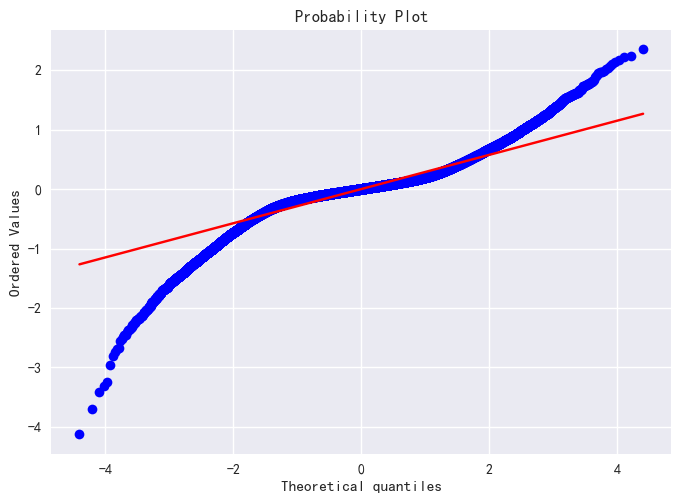

In [10]:
# 正态性
res = stats.probplot(model2.resid, plot=plt)

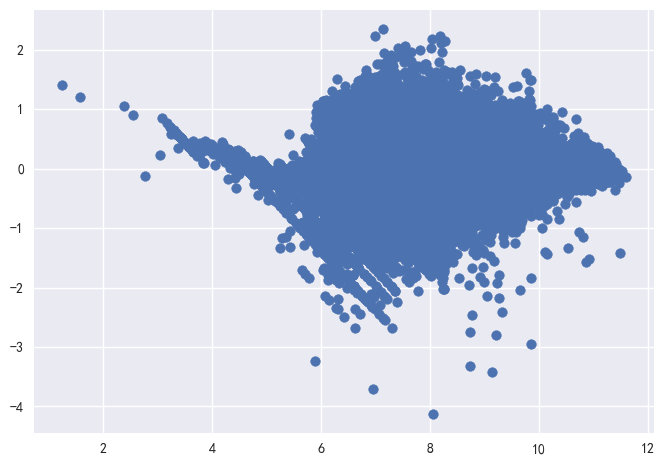

In [53]:
# 同方差 喇叭状开口的散点图是表示有问题
plt.scatter(model2.predict(data2),model2.resid)

In [11]:
# 处理离群值（3倍标准差） ，可以跑完模型后再通过残差筛，看残差有没有超过3倍标准差的
data2.shape
z = np.abs(stats.zscore(model2.resid))
data3 = data2.loc[z<3,:] # 只能运行一次
data3.shape

(129710, 25)

(126946, 25)

In [12]:
# 划分数据集
from sklearn.model_selection import train_test_split
train,test = train_test_split(data3,test_size=0.2,random_state=42)

In [13]:
formula2 = 'np.log(price+1)~model+brand+bodyType+fuelType+gearbox+power+kilometer+v_0+v_1+v_2+v_3+v_4+v_5+v_6+v_7+v_8+v_9+v_10+v_11+v_12+v_13+v_14+车龄'
model3 = smf.ols(formula2,train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(price + 1)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 9.199e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        15:05:02   Log-Likelihood:                -1302.4
No. Observations:              101556   AIC:                             2653.
Df Residuals:                  101532   BIC:                             2882.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.063e+06   1.01e+05     10.542      0.000    8.66e+05    1.26e+06
model          0.0002   2.22e-05      8.757      0.000       0.000       0.000
brand         -0.0011      0.000     -9.435      0.000      -0.001      -0.001
bodyType   -9.665e-05      0.001     -0.169      0.866      -0.001       0.001
fuelType      -0.0062      0.002     -3.885      0.000      -0.009      -0.003
gearbox        0.0324      0.002     16.042      0.000       0.028       0.036
power          0.0002   7.25e-06     21.122      0.000       0.000       0.000
kilometer     -0.0098      0.000    -38.786      0.000      -0.010      -0.009
v_0        -2.426e+04   2301.760    -10.540      0.000   -2.88e+04   -1.97e+04
v_1        -5.726e+05   5.53e+04    -10.348      0.000   -6.81e+05   -4.64e+05
v_2        -2.104e+05   2.06e+04    -10.234      0.000   -2.51e+05    -1.7e+05
v_3          1.13e+04   1142.724      9.885      0.000    9055.758    1.35e+04
v_4         -115.5548     13.759     -8.399      0.000    -142.522     -88.588
v_5          462.0414    132.358      3.491      0.000     202.621     721.462
v_6         -230.4788     10.225    -22.540      0.000    -250.520    -210.437
v_7           79.6662     22.904      3.478      0.001      34.775     124.557
v_8           91.0064     35.296      2.578      0.010      21.827     160.186
v_9          121.8187     33.234      3.665      0.000      56.680     186.957
v_10       -4.776e+05   4.61e+04    -10.361      0.000   -5.68e+05   -3.87e+05
v_11        3.733e+05   3.62e+04     10.300      0.000    3.02e+05    4.44e+05
v_12        7.338e+04   7247.394     10.126      0.000    5.92e+04    8.76e+04
v_13         283.4518     32.411      8.746      0.000     219.927     346.977
v_14          -2.7563      0.377     -7.320      0.000      -3.494      -2.018
车龄             0.0131      0.000     31.861      0.000       0.012       0.014
==============================================================================
Omnibus:                     6536.538   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29491.791
Skew:                          -0.124   Prob(JB):                         0.00
Kurtosis:                       5.628   Cond. No.                     3.05e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.5e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
# 计算线性模型的评估指标
from sklearn.metrics import mean_squared_error
# 因为刚建模的时候取了对数+1 ，现在需要变回来
pred = np.exp(model3.predict(test))-1
mean_squared_error(test['price'],pred)

2985971.574028084

In [20]:
mean_squared_error(train_data['price'],TP.predict(train_data))
Xtrain.join(Ytrain)

305480.1884638282

In [25]:
train_data=TabularDataset(Xtrain.join(Ytrain))
TP_2=TabularPredictor(label='price').fit(train_data)
mean_squared_error(Ytest,np.exp(TP_2.predict(Xtest))-1)

No path specified. Models will be saved in: "AutogluonModels\ag-20230503_073011\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230503_073011\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    101556
Train Data Columns: 23
Label Column: price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.512925464970229, 3.258096538021482, 8.18265, 1.14539)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify proble

[1000]	valid_set's rmse: 0.198316
[2000]	valid_set's rmse: 0.195196
[3000]	valid_set's rmse: 0.19425
[4000]	valid_set's rmse: 0.194173
[5000]	valid_set's rmse: 0.193901
[6000]	valid_set's rmse: 0.194191


	-0.1938	 = Validation score   (-root_mean_squared_error)
	19.77s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.195796


	-0.1955	 = Validation score   (-root_mean_squared_error)
	3.97s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.2036	 = Validation score   (-root_mean_squared_error)
	98.45s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ...
	-0.1917	 = Validation score   (-root_mean_squared_error)
	98.2s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.2025	 = Validation score   (-root_mean_squared_error)
	28.57s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.1916	 = Validation score   (-root_mean_squared_error)
	130.63s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-0.1936	 = Validation score   (-root_mean_squared_error)
	8.23s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.24	 = Validation score   (-root_mean_squared_error)
	82.31s	 = Training   runtime
	0.02s	 = Validation r

1210323.7685086657

In [18]:
from autogluon.tabular import TabularDataset,TabularPredictor
from sklearn.metrics import classification_report
train_data=TabularDataset(data3)
TP=TabularPredictor(label='price').fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20230503_071002\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230503_071002\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    126946
Train Data Columns: 24
Label Column: price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (99999, 13, 6440.80448, 7710.48341)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['bina

[1000]	valid_set's rmse: 1300.39
[2000]	valid_set's rmse: 1257.28
[3000]	valid_set's rmse: 1243.19
[4000]	valid_set's rmse: 1230.64
[5000]	valid_set's rmse: 1222.27
[6000]	valid_set's rmse: 1217.37
[7000]	valid_set's rmse: 1216.2
[8000]	valid_set's rmse: 1214.76
[9000]	valid_set's rmse: 1214.35
[10000]	valid_set's rmse: 1213.1


	-1212.5393	 = Validation score   (-root_mean_squared_error)
	35.0s	 = Training   runtime
	0.58s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 1191.92
[2000]	valid_set's rmse: 1173.63
[3000]	valid_set's rmse: 1168.25


	-1167.7427	 = Validation score   (-root_mean_squared_error)
	13.77s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-1278.3443	 = Validation score   (-root_mean_squared_error)
	133.44s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-1119.7774	 = Validation score   (-root_mean_squared_error)
	144.25s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-1219.3768	 = Validation score   (-root_mean_squared_error)
	50.46s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1302.8036	 = Validation score   (-root_mean_squared_error)
	174.47s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ...
	-1102.692	 = Validation score   (-root_mean_squared_error)
	21.8s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1561.5662	 = Validation score   (-root_mean_squared_error)
	111.18s	 = Training   run

[1000]	valid_set's rmse: 1148.11


	-1144.6704	 = Validation score   (-root_mean_squared_error)
	13.71s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-1083.1147	 = Validation score   (-root_mean_squared_error)
	0.29s	 = Training   runtime
	0.01s	 = Validation runtime
AutoGluon training complete, total runtime = 705.07s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20230503_071002\")


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [21]:
# 调整数据集，因为刚才取过了自然对数，为了保持两个模型数据一致
Xtrain = train[model3.params.index[1:]]
Ytrain = np.log(train['price']+1)

Xtest = test[model3.params.index[1:]]
Ytest = test['price']

In [24]:
Xtrain.join(Ytrain).head(2)

,model,brand,bodyType,fuelType,gearbox,power,kilometer,v_0,v_1,v_2,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,车龄,price
48699,13.0,4,0.0,1.0,1.0,184,5.0,47.313582,-3.171659,0.666860,...,0.118596,0.116845,0.023572,1.296689,-3.376267,4.500221,-0.302686,1.241813,4.0,10.146473
125473,29.0,0,1.0,0.0,0.0,50,15.0,42.558153,-3.096427,-0.493654,...,0.114214,0.054666,0.054863,3.378580,-0.590815,-1.110694,-0.021262,0.370711,16.0,7.550135


In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)
pred = np.exp(lr.predict(Xtest))-1
mean_squared_error(Ytest,pred)

LinearRegression()

2985971.6714676116

In [84]:
np.array(Xtrain)[:3]

array([[ 1.30000000e+01,  4.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.84000000e+02,
         5.00000000e+00,  4.73135822e+01, -3.17165916e+00,
         6.66859658e-01, -3.72323416e+00, -9.89405269e-01,
         2.65282906e-01,  1.01586844e-03,  1.18595814e-01,
         1.16844925e-01,  2.35720173e-02,  1.29668866e+00,
        -3.37626733e+00,  4.50022061e+00, -3.02685770e-01,
         1.24181340e+00,  4.00000000e+00],
       [ 2.90000000e+01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.00000000e+01,
         1.50000000e+01,  4.25581532e+01, -3.09642707e+00,
        -4.93654108e-01,  6.85587975e-01, -2.70484003e-01,
         2.45412338e-01,  6.80816354e-05,  1.14213869e-01,
         5.46659941e-02,  5.48632289e-02,  3.37858025e+00,
        -5.90815016e-01, -1.11069409e+00, -2.12620778e-02,
         3.70710911e-01,  1.60000000e+01],
       [ 1.90000000e+01,  2.10000000e+01,  0.00000000e+00,
         0.00000000e+00,  1.0

In [105]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(oob_score=True)
RF.fit(Xtrain,Ytrain)

# 测试集MSE评估
pred_RF = np.exp(RF.predict(Xtest))-1
mean_squared_error(Ytest,pred_RF)

RandomForestRegressor(oob_score=True)

1728883.4737045025

In [104]:
Xtrain.shape

(101556, 23)

In [95]:
RF = RandomForestRegressor(oob_score=True)
RF.fit(Xtrain.values,Ytrain.values)

KeyboardInterrupt: 

In [80]:
from sklearn import tree
DT = tree.DecisionTreeRegressor()
DT.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(DT.predict(Xtest))-1)

DecisionTreeRegressor()

3608875.7283661887

In [87]:
from sklearn.ensemble import AdaBoostRegressor
#先实例一个机器学习器
lr2 = LinearRegression()
# 如果没有指定机器学习器，则默认为决策树（最大深度为1）
ada= AdaBoostRegressor(base_estimator= lr2, n_estimators= 20)  # 实例化
ada.fit(Xtrain, Ytrain)
mean_squared_error(Ytest,np.exp(ada.predict(Xtest))-1)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=20)

4524485.81237774

In [90]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(XGB.predict(Xtest))-1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

1626580.2911192125

In [1]:
# LightGBM
from lightgbm import LGBMRegressor
LGB = LGBMRegressor()
LGB.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(LGB.predict(Xtest))-1)

NameError: name 'Xtrain' is not defined

In [92]:
# 调参
# XGBoost最优 ，对其调参
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':np.arange(80,160,20),
         'max_depth':np.arange(2,6,1),
         'colsample_bytree':[0.8,0.9,1],
         'booster':['gbtree','gblinear'],
         'reg_lambda':[0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]}
XGB_2 = XGBRegressor()
# 以下cv是3折交叉验证
grid_XGB_2 = GridSearchCV(XGB_2,param,cv=3,n_jobs=-1)
grid_XGB_2.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(grid_XGB_2.predict(Xtest))-1)

KeyboardInterrupt: 

In [93]:
from sklearn.model_selection import RandomizedSearchCV
param = {'n_estimators':np.arange(80,160,20),
         'max_depth':np.arange(2,6,1),
         'colsample_bytree':[0.8,0.9,1],
         'booster':['gbtree','gblinear'],
         'reg_lambda':[0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]}

XGB_3 = XGBRegressor()

random_cv = RandomizedSearchCV(
    XGB_3, param, n_iter=100, cv=3, scoring="r2", n_jobs=6
)

random_cv.fit(Xtrain,Ytrain)
mean_squared_error(Ytest,np.exp(random_cv.predict(Xtest))-1)

KeyboardInterrupt: 

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import classification_report

param_distribs = {
        'n_estimators': randint(low=100, high=200),
        'max_features': randint(low=8, high=15),
        'max_depth': randint(low=80, high=90)
    }
RF = RandomForestRegressor(random_state=42,n_jobs=-1)
rnd_RF = RandomizedSearchCV(RF, param_distribs, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_RF.fit(Xtrain,Ytrain)
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytest,np.exp(grid_XGB_2.predict(Xtest))-1)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019417D0D000>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019417D0C730>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019417D0CC40>},
                   random_state=42, scoring='accuracy')

NameError: name 'grid_XGB_2' is not defined

In [16]:
mean_squared_error(Ytest,np.exp(rnd_RF.predict(Xtest))-1)

1718223.5260657317